# MULTIVARIATE LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time 
from sklearn.linear_model import LinearRegression
from matplotlib import cm


# READ THE DATASET

In [2]:
dataframe = pd.read_csv("./Data/ex1data2.txt", delimiter=',', header = 0, dtype = np.float32)
# otterrò una struttura dati chiamata pandas dataframe
# l'indice è fittizio e può essere usato per le queries

In [3]:
dataframe

,Size of the house (in square feet),Number of bedrooms,Price of the house
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,232000.0
4,3000.0,4.0,539900.0
5,1985.0,4.0,299900.0
6,1534.0,3.0,314900.0
7,1427.0,3.0,198999.0
8,1380.0,3.0,212000.0
9,1494.0,3.0,242500.0


In [4]:
dataframe.shape

(47, 3)

In [5]:
dataframe.columns

Index(['Size of the house (in square feet)', 'Number of bedrooms',
       'Price of the house'],
      dtype='object')

In [6]:
dataframe.head(10)

,Size of the house (in square feet),Number of bedrooms,Price of the house
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,232000.0
4,3000.0,4.0,539900.0
5,1985.0,4.0,299900.0
6,1534.0,3.0,314900.0
7,1427.0,3.0,198999.0
8,1380.0,3.0,212000.0
9,1494.0,3.0,242500.0


# PLOT THE DATASET

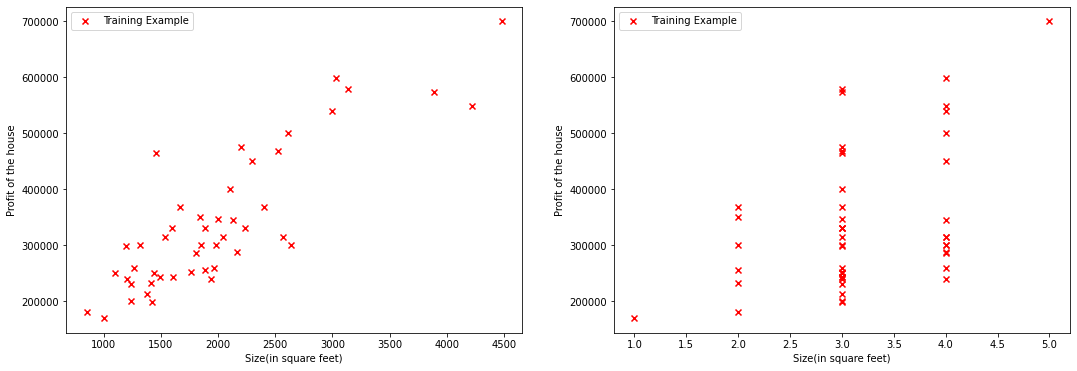

In [7]:
#stiamo creando i subplot
#assegno a fig, mi servirà
fig = plt.figure(figsize = (18,6)) # dichiaro l'ambiente per disegnare

# 121 = 1 riga e 2 colonne e va al 1 
ax1 = fig.add_subplot(121)
# 121 = 1 riga e 2 colonne e va al 2
ax2 = fig.add_subplot(122)


ax1.scatter(dataframe['Size of the house (in square feet)'],dataframe['Price of the house'],marker='x', c='red', label='Training Example')
ax1.set_xlabel("Size(in square feet)")
ax1.set_ylabel("Profit of the house")
ax1.legend(loc = 'upper left', ncol=4)

ax2.scatter(dataframe['Number of bedrooms'],dataframe['Price of the house'],marker='x', c='red', label='Training Example')
ax2.set_xlabel("Size(in square feet)")
ax2.set_ylabel("Profit of the house")
ax2.legend(loc = 'upper left', ncol=4)

plt.show()

In [8]:
#loc
#1° parametro = numero delle righe
#2° parametro = numero delle colonne
dataframe.loc[:,['Size of the house (in square feet)']]

,Size of the house (in square feet)
0,2104.0
1,1600.0
2,2400.0
3,1416.0
4,3000.0
5,1985.0
6,1534.0
7,1427.0
8,1380.0
9,1494.0


In [9]:
#Iloc
#1° parametro = numero delle righe
#2° parametro = numero delle colonne
dataframe.iloc[:,[0,1]]

,Size of the house (in square feet),Number of bedrooms
0,2104.0,3.0
1,1600.0,3.0
2,2400.0,3.0
3,1416.0,2.0
4,3000.0,4.0
5,1985.0,4.0
6,1534.0,3.0
7,1427.0,3.0
8,1380.0,3.0
9,1494.0,3.0


In [10]:
# Supervised Learning: bisogna dividere input dall'ouput

X = dataframe.iloc[:,[0,1]].values
Y = dataframe.iloc[:,[-1]].values
print(X.shape)
print(Y.shape)

(47, 2)
(47, 1)


# FEATURE SCALING

$$\large z_{j}^{(i)} = \frac{x_{j}^{(i)} - \mu_{j}}{\sigma_{j}} $$
$$\large z_{j}^{(i)} = \frac{x_{j}^{(i)} - \mu_{j}}{max_{j}-min_{j}} $$

In [11]:
def featureScaling(X):
    
    Z = np.copy(X)
    
    mu = np.mean(Z, axis = 0) #axis = 0 lo fa per le colonne
    std = np.std(Z, axis = 0)
    
    Z = (Z - mu)/std
 
    return Z

In [12]:
Z = featureScaling(X)

In [13]:
#aggiungo la colonna di 1
X_scaled = np.c_[np.ones(Z.shape[0]), Z]


In [17]:
Y

array([[399900.],
       [329900.],
       [369000.],
       [232000.],
       [539900.],
       [299900.],
       [314900.],
       [198999.],
       [212000.],
       [242500.],
       [239999.],
       [347000.],
       [329999.],
       [699900.],
       [259900.],
       [449900.],
       [299900.],
       [199900.],
       [499998.],
       [599000.],
       [252900.],
       [255000.],
       [242900.],
       [259900.],
       [573900.],
       [249900.],
       [464500.],
       [469000.],
       [475000.],
       [299900.],
       [349900.],
       [169900.],
       [314900.],
       [579900.],
       [285900.],
       [249900.],
       [229900.],
       [345000.],
       [549000.],
       [287000.],
       [368500.],
       [329900.],
       [314000.],
       [299000.],
       [179900.],
       [299900.],
       [239500.]], dtype=float32)

In [14]:
def costLoopBased(x,y, theta= np.zeros((X_scaled.shape[1],1))):
    m = x.shape[0]
    n = x.shape[1]
    J = 0
    
    elapsed_time = 0
    elapsed_time -= time.time()
    for i in range(m): # iterate on over all the input example
        h = 0
        for j in range (n): # iterate over each input feature
            
            h += theta[j]*x[i][j]
            
        J += (h - y[i])**2 ##individual loss
    J = J/(2*m),3
    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi
    
    return np.round(J[0],3), np.round(elapsed_time,3)

In [28]:
cost_lb, etime_lb= costLoopBased(X_scaled,Y)
print(cost_lb)

[6.55915481e+10]


In [29]:
def costVectorial(x,y, theta= np.zeros((X_scaled.shape[1],1))):
    m = x.shape[0]

    J = 0
    
    elapsed_time = 0
    elapsed_time -= time.time()

    J = (x.dot(theta) - y).T.dot((x.dot(theta) - y))
    J = J/(2*m)

    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi
    
    return np.round(J[0],3), np.round(elapsed_time,3)

In [30]:
cost_v, etime_v= costVectorial(X_scaled,Y)
print(cost_v)

[6.55915481e+10]


In [31]:
def gradientDescentLoop(x, y, theta = np.zeros((X_scaled.shape[1],1)), alpha = 0.003, max_iters = 20000, early = False, epsilon = 0.00001):
    
    m = x.shape[0]
    n = x.shape[1]
    J_history = np.zeros((max_iters,1))
    theta_history = []

    theta_gd = np.copy(theta)
    
    elapsed_time = 0
    elapsed_time -= time.time()

    for iter in range (max_iters):
        J_history[iter],_ = costLoopBased(x,y, theta_gd)
        theta_history.append(np.copy(theta_gd))
        h = np.zeros((m,1))
        partial = np.zeros((n,1))
        
        for i in range(m):
            for j in range(n):
                h[i] += theta_gd[j]*x[i][j]
            
            for j in range(n):
                partial[j] += (h[i] - y[i])*x[i][j]
                
        #simultaneously update each parameter        
        for j in range(n):
            theta_gd[j] = theta_gd[j] - (alpha/m)*partial[j]
        if(early):
            if(iter != 0):
                if(np.abs(J_history[iter] - J_history[iter-1]) < epsilon):
                        theta_history.append(theta_gd)
                        elapsed_time += time.time()
                        elapsed_time *= 1000 # porto i secondi in millisecondi
                        return theta_gd, J_history[J_history != 0], round(elapsed_time,3), theta_history
    
    theta_history.append(np.copy(theta_gd))
    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi

    return theta_gd, J_history, round(elapsed_time,3), theta_history
    

In [32]:
theta_gd, cost_history, gd_elapsed_time, theta_history= gradientDescentLoop(X_scaled,Y)

In [33]:
def gradientDescentVectorized(x, y, theta = np.zeros((X.shape[1],1)), alpha = 0.001, max_iters = 200000, early = False, epsilon = 0.00001):
    
    m = x.shape[0]

    J_history = np.zeros((max_iters,1))
    theta_history = []

    theta_gd = np.copy(theta)
    
    elapsed_time = 0
    elapsed_time -= time.time()

    for iter in range (max_iters):
        J_history[iter],_ = costVectorial(x,y, theta = theta_gd)
        
        theta_gd = theta_gd - (alpha/m) *x.T.dot(x.dot(theta_gd) - y)
        theta_history.append(np.copy(theta_gd))        
        
        if(early):
            if(iter != 0):
                if(np.abs(J_history[iter] - J_history[iter-1]) < epsilon):
                        theta_history.append(theta_gd)
                        elapsed_time += time.time()
                        elapsed_time *= 1000 # porto i secondi in millisecondi
                        return theta_gd, J_history[J_history != 0], round(elapsed_time,3), theta_history
    
    theta_history.append(np.copy(theta_gd))
    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi

    return theta_gd, J_history, round(elapsed_time,3), theta_history
    

In [93]:
#theta_gd, cost_history, gd_elapsed_time, theta_history= gradientDescentLoop(x,y,theta = np.zeros((x.shape[1], 1)))
theta_gd_vectorized, cost_history_vectorized, gd_elapsed_time_vectorized, theta_history_vectorized = gradientDescentVectorized(X_scaled, Y, theta = np.zeros((X_scaled.shape[1], 1)), alpha = 0.001 , max_iters = 30000, early=True, epsilon=0.0001)



In [94]:
cost_history_vectorized

array([6.55915481e+10, 6.54615565e+10, 6.53318377e+10, ...,
       2.04328004e+09, 2.04328004e+09, 2.04328004e+09])

In [95]:
theta_gd_vectorized

array([[340412.66783644],
       [109446.2238118 ],
       [ -6576.78043259]])

# PLOT THE COST

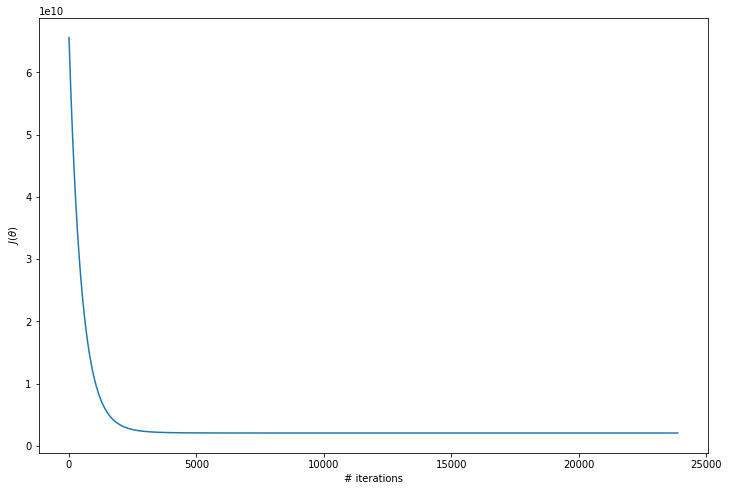

In [96]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(cost_history_vectorized.shape[0])+1, cost_history_vectorized, label = r'$J({\theta})$');
plt.xlabel("# iterations")
plt.ylabel(r'$J({\theta})$')
plt.show()

# Countour Plot wrt $\theta_{1}$ and $\theta_{2}$($\theta_{0}$ = 0)

In [103]:
B1 = np.linspace(0,300, 100)
B2 = np.linspace(-50000,100000, 100)
# ottengo coppie (x,y)
xx,yy = np.meshgrid(B1,B2, indexing = 'xy')

In [108]:
cost = np.zeros((B1.shape[0], B2.shape[0]))

#ndenumerate itera sulle multidimensioni
for (i,j), v in np.ndenumerate(cost):  #i è la coppia di coordinate e j è il valore di z
    cost[i,j],_ = costVectorial(X,Y, theta = [[xx[i,j]], [yy[i,j]]])

In [152]:
BS1 = np.linspace(-1000000,1000000, 100)
BS2 = np.linspace(-1000000,1000000, 100)
# ottengo coppie (x,y)
xxs,yys = np.meshgrid(BS1,BS2, indexing = 'xy')

In [153]:
cost_scaled = np.zeros((BS1.shape[0], BS2.shape[0]))

#ndenumerate itera sulle multidimensioni
for (i,j), v in np.ndenumerate(cost_scaled):  #i è la coppia di coordinate e j è il valore di z
    cost_scaled[i,j],_ = costVectorial(Z,Y, theta = [[xxs[i,j]], [yys[i,j]]])

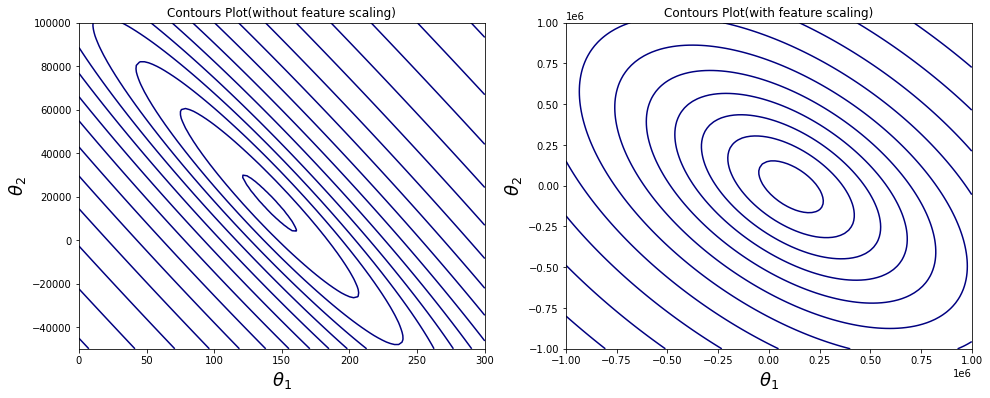

In [154]:
fig = plt.figure(figsize = (16,6))

ax1 = fig.add_subplot(121)
ax1.contour(xx,yy,cost, np.logspace(-100, 300, 3000), cmap=plt.cm.jet)
ax1.set_xlabel(r'$\theta_1$', fontsize ='18')
ax1.set_ylabel(r'$\theta_2$', fontsize ='18')
ax1.set_title("Contours Plot(without feature scaling)")

ax2 = fig.add_subplot(122)
ax2.contour(xxs,yys,cost_scaled, np.logspace(-100, 300, 3000), cmap=plt.cm.jet)
ax2.set_xlabel(r'$\theta_1$', fontsize ='18')
ax2.set_ylabel(r'$\theta_2$', fontsize ='18')
ax2.set_title("Contours Plot(without feature scaling)")
ax2.set_title("Contours Plot(with feature scaling)")

plt.show()